In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/korean-demographics-20002022/Korean_demographics_2000-2022.csv


# Loading Data

In [2]:
data = pd.read_csv('/kaggle/input/korean-demographics-20002022/Korean_demographics_2000-2022.csv')
data.head()

Date             Region   Birth  Birth_rate   Death  Death_rate  \
0  1/1/2000              Busan  3752.0       11.61  1875.0         5.8   
1  1/1/2000  Chungcheongbuk-do  1903.0       15.06   924.0         7.3   
2  1/1/2000  Chungcheongnam-do  2398.0       14.75  1466.0         9.0   
3  1/1/2000              Daegu  3057.0       14.39  1117.0         5.3   
4  1/1/2000            Daejeon  1859.0       16.08   565.0         4.9   

   Divorce  Divorce_rate  Marriage  Marriage_rate  Natural_growth  \
0    814.0           2.5    2435.0            7.5          1877.0   
1    220.0           1.7     828.0            6.6           979.0   
2    321.0           2.0    1055.0            6.5           932.0   
3    422.0           2.0    1577.0            7.4          1940.0   
4    280.0           2.4     868.0            7.5          1294.0   

   Natural_growth_rate  
0                  5.8  
1                  7.7  
2                  5.7  
3                  9.1  
4                 11.2

In [3]:
#데이터 정보 확인

print(data.shape) #행,열 확인
print("-----------")
print(data.dtypes) # 데이터들의 타입 확인
print("-----------")
print(data.describe()) # 데이터들의 통계량 확인
print("-----------")
print(data.info()) #데이터들의 타입, 결측치 등 확인
print("-----------")
print(data.isnull()) #결측치 확인

(4860, 12)
-----------
Date                    object
Region                  object
Birth                  float64
Birth_rate             float64
Death                  float64
Death_rate             float64
Divorce                float64
Divorce_rate           float64
Marriage               float64
Marriage_rate          float64
Natural_growth         float64
Natural_growth_rate    float64
dtype: object
-----------
              Birth   Birth_rate         Death   Death_rate       Divorce  \
count   4716.000000  4709.000000   4716.000000  4709.000000   4716.000000   
mean    4138.169635     8.737872   2556.818066     5.857528   1130.374894   
std     8450.112413     2.358128   5029.234791     1.589019   2287.594278   
min       67.000000     3.100000     52.000000     3.100000     10.000000   
25%     1004.750000     7.210000    692.500000     4.500000    278.000000   
50%     1431.500000     8.830000   1149.000000     5.600000    392.000000   
75%     2327.000000    10.070000   1721.

In [4]:
data = data.dropna() #결측값 제거
data.head()

Date             Region   Birth  Birth_rate   Death  Death_rate  \
0  1/1/2000              Busan  3752.0       11.61  1875.0         5.8   
1  1/1/2000  Chungcheongbuk-do  1903.0       15.06   924.0         7.3   
2  1/1/2000  Chungcheongnam-do  2398.0       14.75  1466.0         9.0   
3  1/1/2000              Daegu  3057.0       14.39  1117.0         5.3   
4  1/1/2000            Daejeon  1859.0       16.08   565.0         4.9   

   Divorce  Divorce_rate  Marriage  Marriage_rate  Natural_growth  \
0    814.0           2.5    2435.0            7.5          1877.0   
1    220.0           1.7     828.0            6.6           979.0   
2    321.0           2.0    1055.0            6.5           932.0   
3    422.0           2.0    1577.0            7.4          1940.0   
4    280.0           2.4     868.0            7.5          1294.0   

   Natural_growth_rate  
0                  5.8  
1                  7.7  
2                  5.7  
3                  9.1  
4                 11.2

In [5]:
data.Region.unique()

array(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju',
       'Jeollabuk-do', 'Jeollanam-do', 'Seoul', 'Ulsan', 'Whole country',
       'Sejong'], dtype=object)

In [6]:
Whole_country = data[data.Region == 'Whole country']

# Whole Country Birth and Death

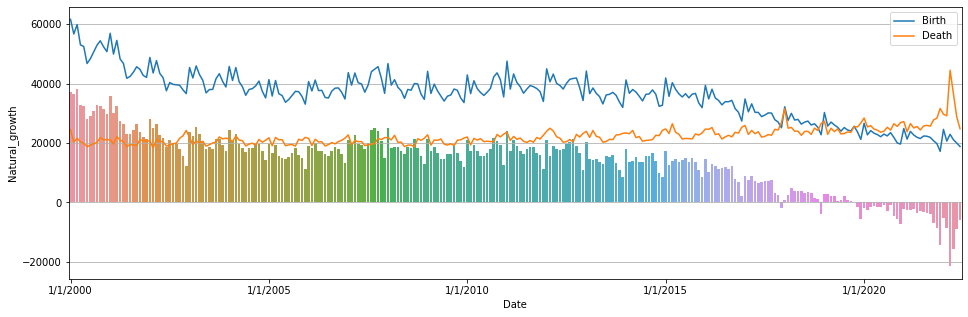

In [7]:
plt.figure(figsize=(16,5))
plt.style.use('default')
plt.ticklabel_format(useOffset=False, style='plain')
sns.lineplot(data=Whole_country, x='Date', y='Birth' ,label='Birth')
sns.lineplot(data=Whole_country, x='Date', y='Death', label='Death')
sns.barplot(data=Whole_country, x='Date', y='Natural_growth')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')
plt.show()

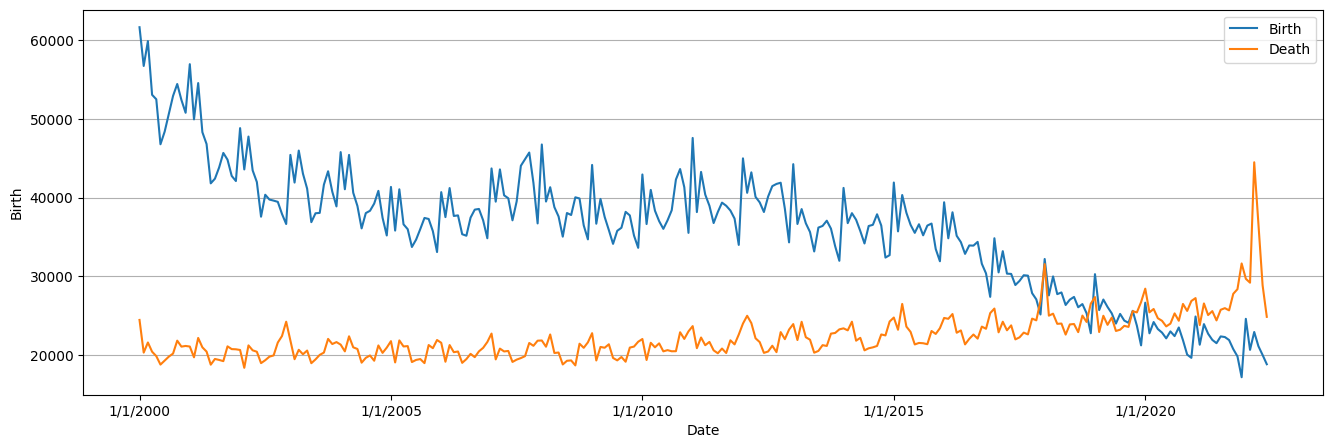

In [8]:
plt.figure(figsize=(16,5))
plt.ticklabel_format(useOffset=False, style='plain')
sns.lineplot(data=Whole_country, x='Date', y='Birth' ,label='Birth')
sns.lineplot(data=Whole_country, x='Date', y='Death', label='Death')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')
plt.show()

# Whole Country Marriage and Divorce

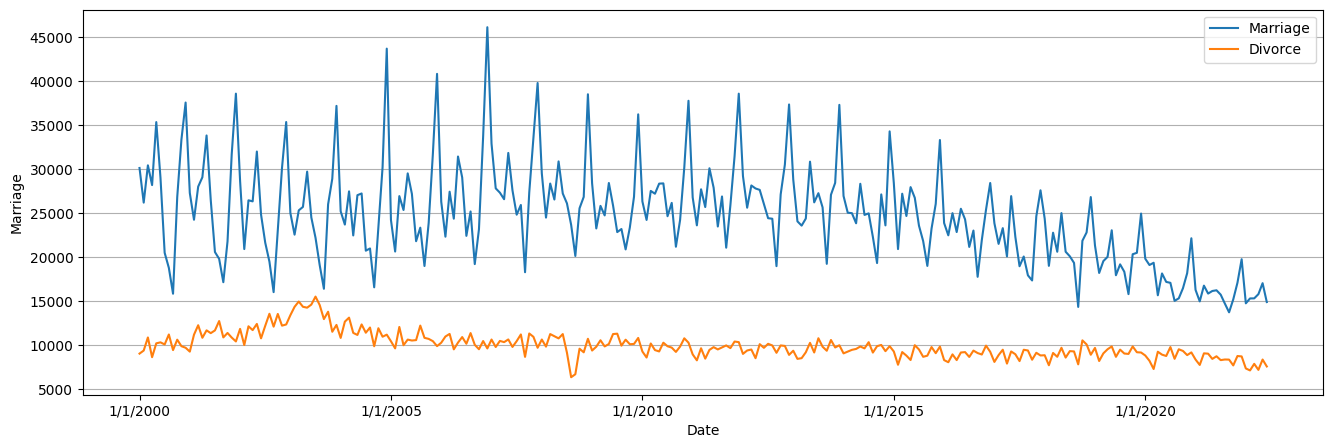

In [9]:
plt.figure(figsize=(16,5))
plt.ticklabel_format(useOffset=False, style='plain')
sns.lineplot(data=Whole_country, x='Date', y='Marriage' ,label='Marriage')
sns.lineplot(data=Whole_country, x='Date', y='Divorce', label='Divorce')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')
plt.show()

# Whole Country Birth_rate

In [10]:
import plotly.express as px

filter_date = data.loc[data['Date'] == '6/1/2022']
filter_Birth = filter_date.Birth[: -1]
filter_region = filter_date.Region[:-1]

fig = px.pie(values=filter_Birth,
             names=filter_region,
             color_discrete_sequence=px.colors.sequential.RdBu,
             title= '6/1/2022 Regional Birth Rate Pie Chart ')
fig.show()

# Comparison Whole Country and Seoul

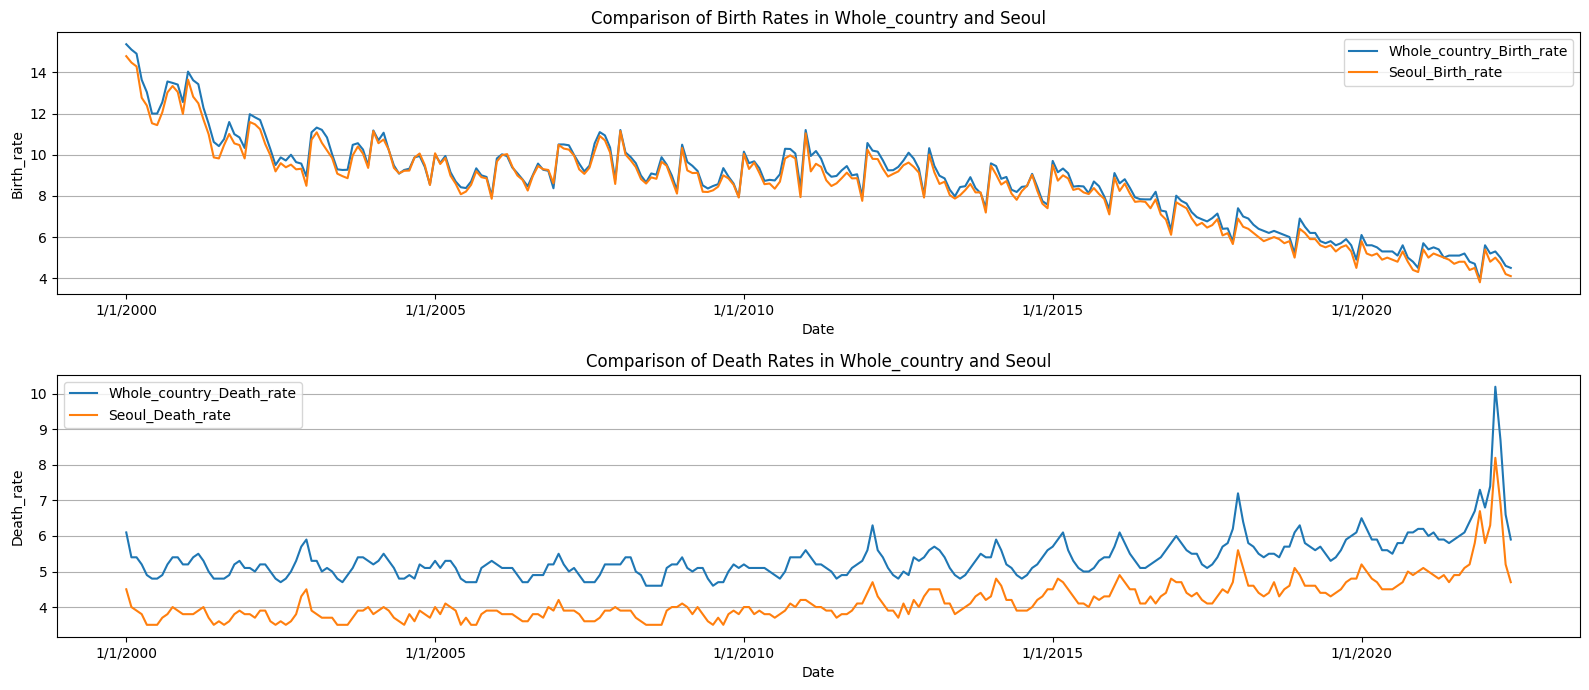

In [11]:
plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=Whole_country, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=data[data.Region == 'Seoul'], x='Date', y='Birth_rate' ,label='Seoul_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Seoul')
plt.ylabel('Birth_rate')

plt.subplot(2, 1, 2)

sns.lineplot(data=Whole_country, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=data[data.Region == 'Seoul'], x='Date', y='Death_rate', label='Seoul_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Seoul')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Comparison Whole Country and Gyeonggi Province

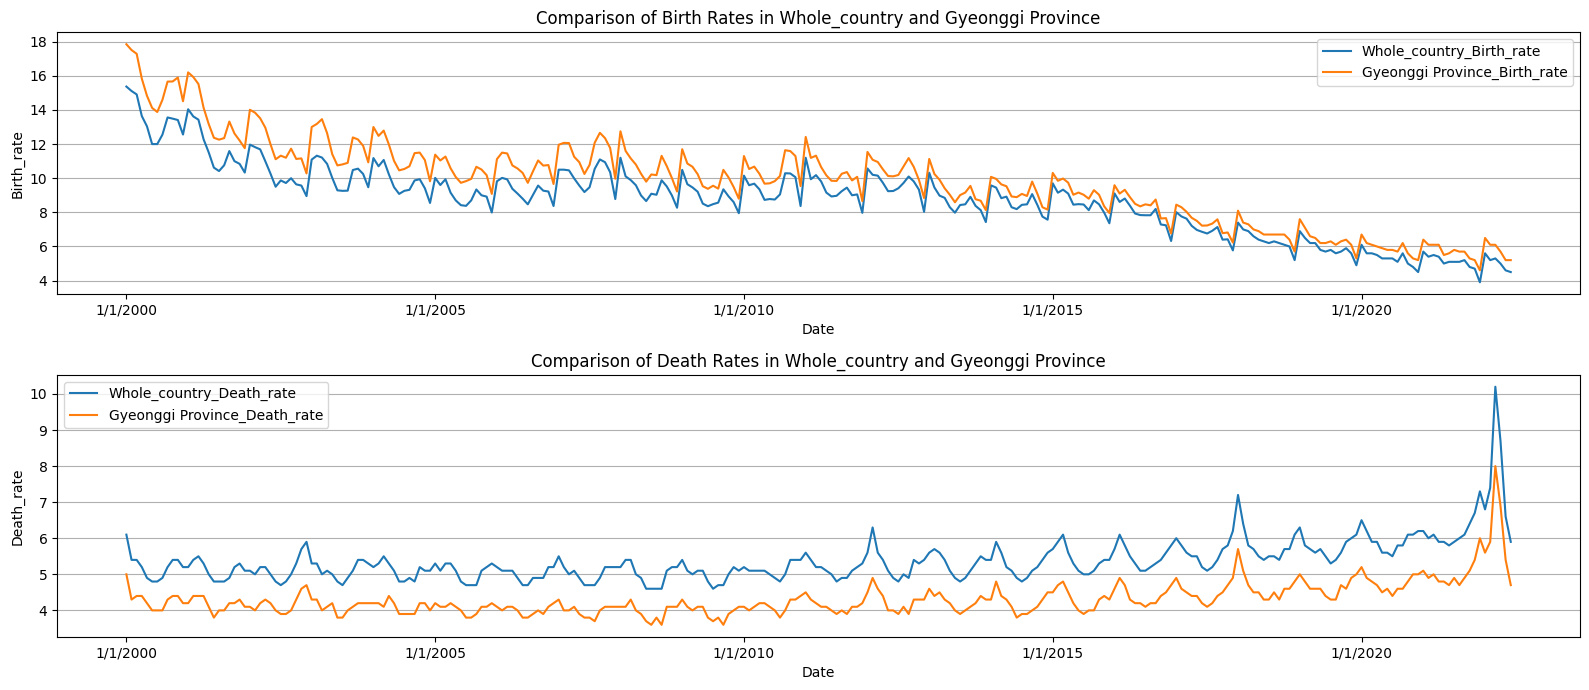

In [12]:
plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=Whole_country, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=data[data.Region == 'Gyeonggi-do'], x='Date', y='Birth_rate' ,label='Gyeonggi Province_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Gyeonggi Province')
plt.ylabel('Birth_rate')

plt.subplot(2, 1, 2)

sns.lineplot(data=Whole_country, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=data[data.Region == 'Gyeonggi-do'], x='Date', y='Death_rate', label='Gyeonggi Province_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Gyeonggi Province')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Comparison Whole Country and Incheon

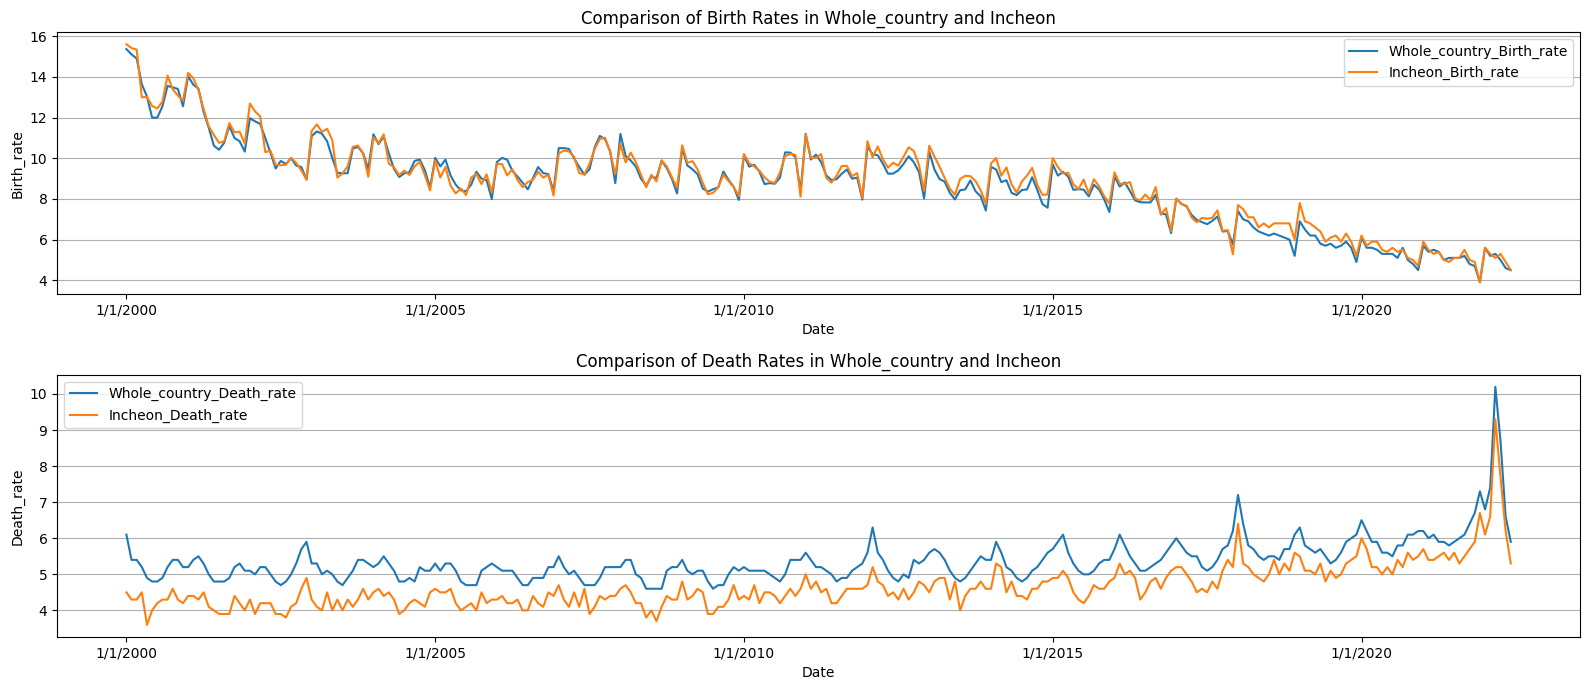

In [13]:
plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=Whole_country, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=data[data.Region == 'Incheon'], x='Date', y='Birth_rate' ,label='Incheon_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Incheon')
plt.ylabel('Birth_rate')

plt.subplot(2, 1, 2)

sns.lineplot(data=Whole_country, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=data[data.Region == 'Incheon'], x='Date', y='Death_rate', label='Incheon_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Incheon')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Comparison Whole Country and Busan

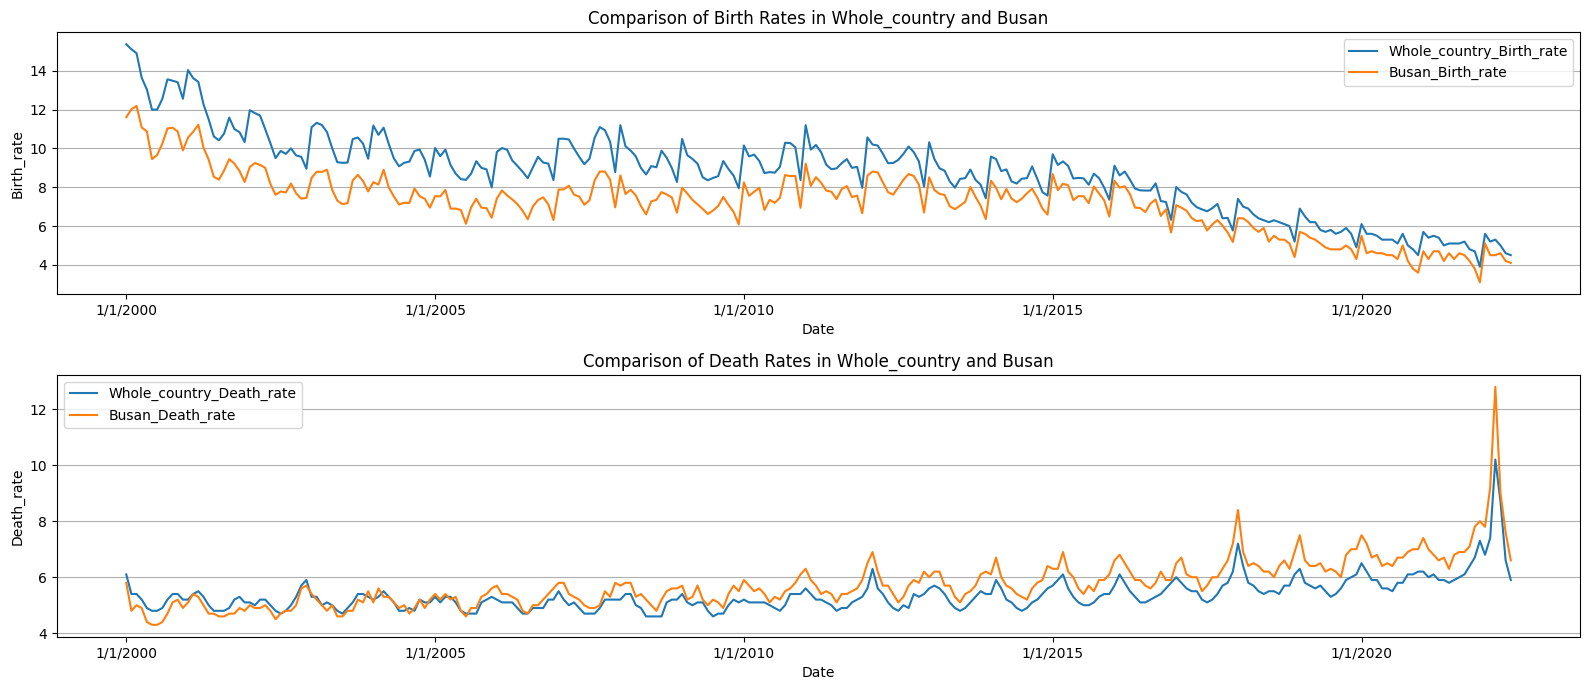

In [14]:
plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=Whole_country, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=data[data.Region == 'Busan'], x='Date', y='Birth_rate' ,label='Busan_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Busan')
plt.ylabel('Birth_rate')

plt.subplot(2, 1, 2)

sns.lineplot(data=Whole_country, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=data[data.Region == 'Busan'], x='Date', y='Death_rate', label='Busan_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Busan')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Comparison Whole Country and Jeju

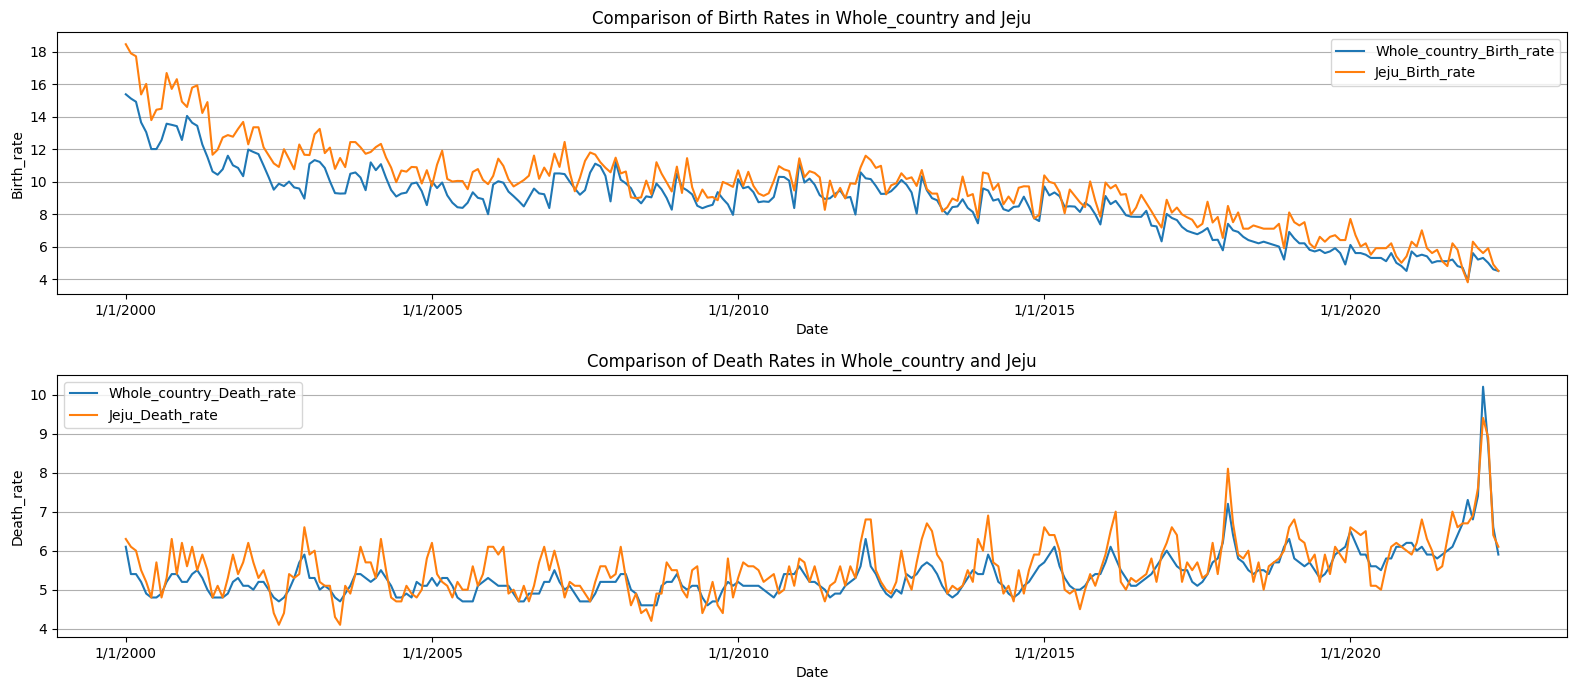

In [15]:
plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=Whole_country, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=data[data.Region == 'Jeju'], x='Date', y='Birth_rate' ,label='Jeju_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Jeju')
plt.ylabel('Birth_rate')

plt.subplot(2, 1, 2)

sns.lineplot(data=Whole_country, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=data[data.Region == 'Jeju'], x='Date', y='Death_rate', label='Jeju_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Jeju')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Comparison Whole Country and Chungcheongbuk Province

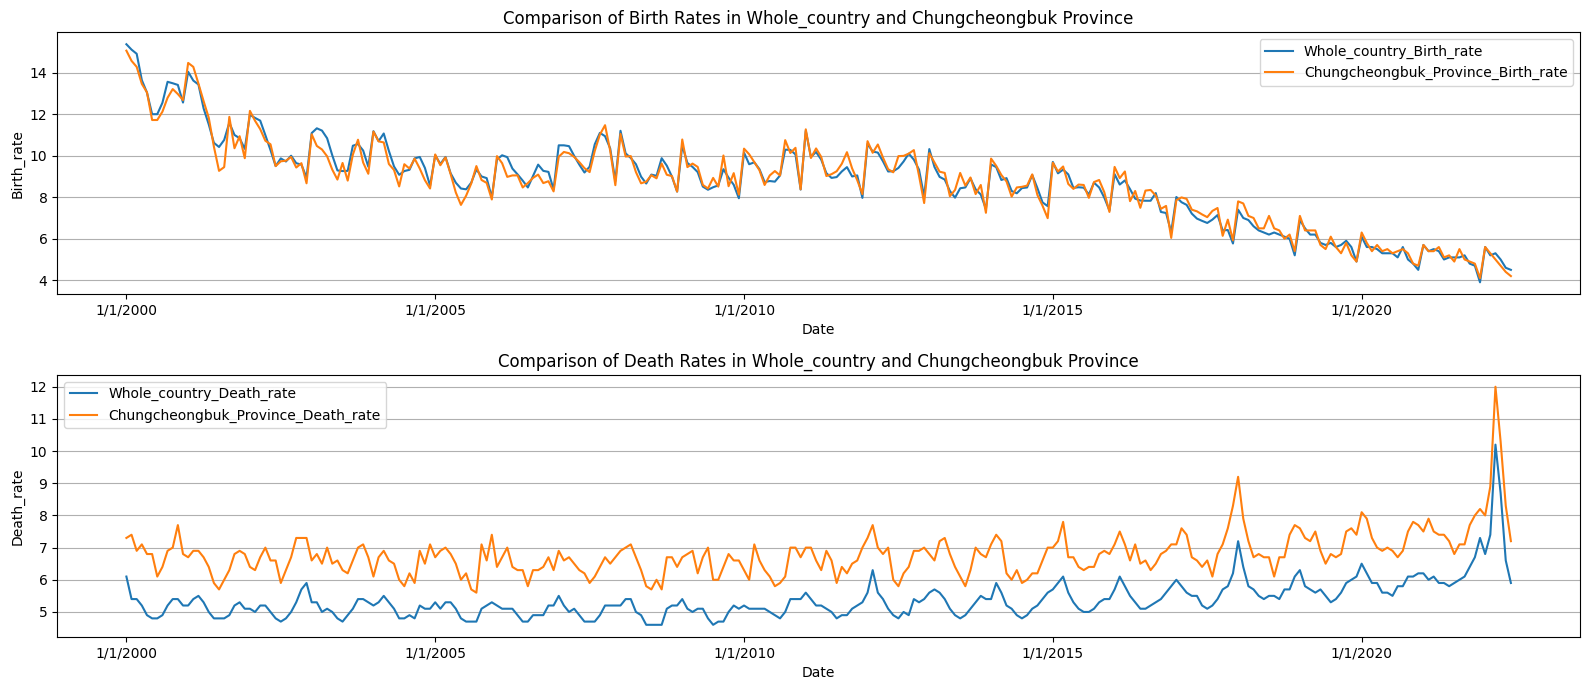

In [16]:
plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=Whole_country, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=data[data.Region == 'Chungcheongbuk-do'], x='Date', y='Birth_rate' ,label='Chungcheongbuk_Province_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Chungcheongbuk Province')
plt.ylabel('Birth_rate')

plt.subplot(2, 1, 2)

sns.lineplot(data=Whole_country, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=data[data.Region == 'Chungcheongbuk-do'], x='Date', y='Death_rate', label='Chungcheongbuk_Province_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Chungcheongbuk Province')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Comparison Whole Country and Chungcheongnam Province

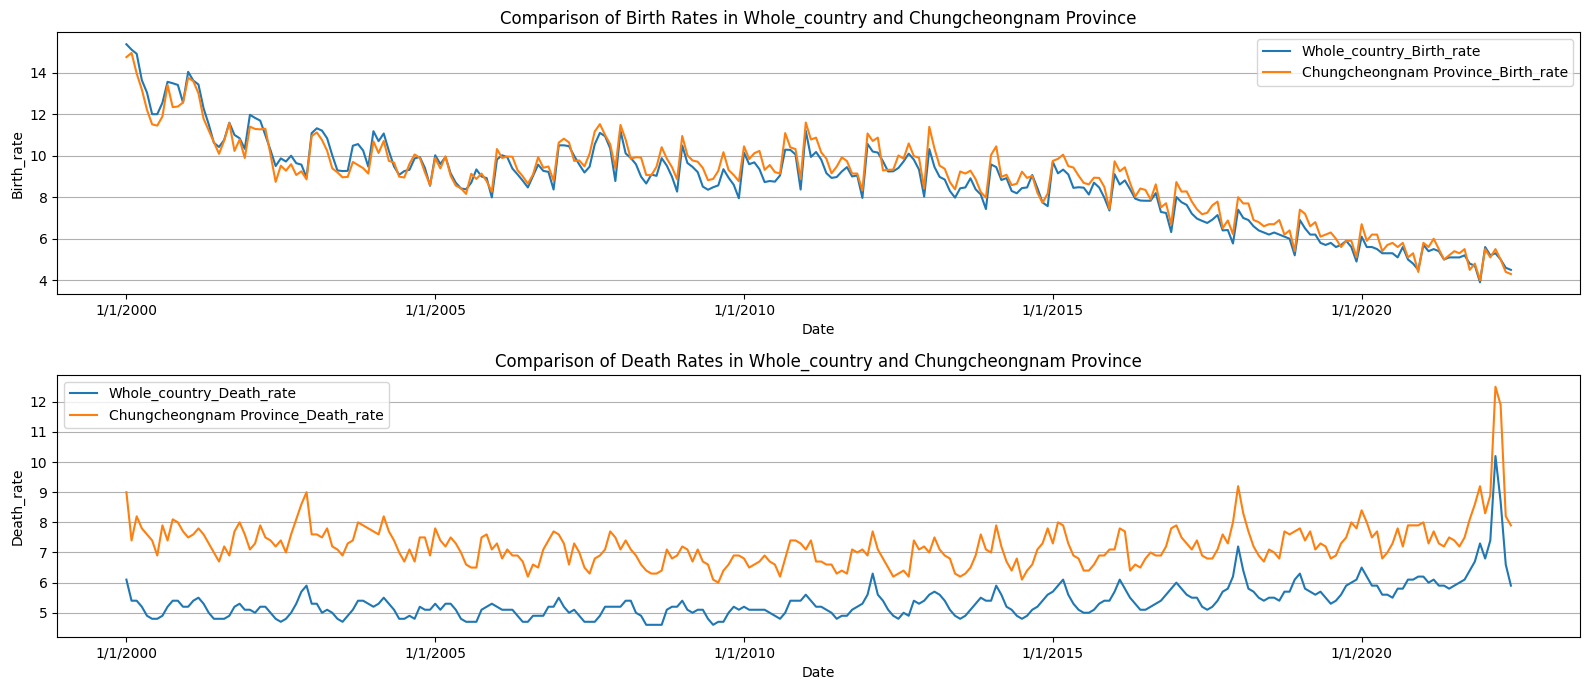

In [17]:
plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=Whole_country, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=data[data.Region == 'Chungcheongnam-do'], x='Date', y='Birth_rate' ,label='Chungcheongnam Province_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Chungcheongnam Province')
plt.ylabel('Birth_rate')

plt.subplot(2, 1, 2)

sns.lineplot(data=Whole_country, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=data[data.Region == 'Chungcheongnam-do'], x='Date', y='Death_rate', label='Chungcheongnam Province_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Chungcheongnam Province')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Comparison Whole Country and Gyeongsangbuk Province

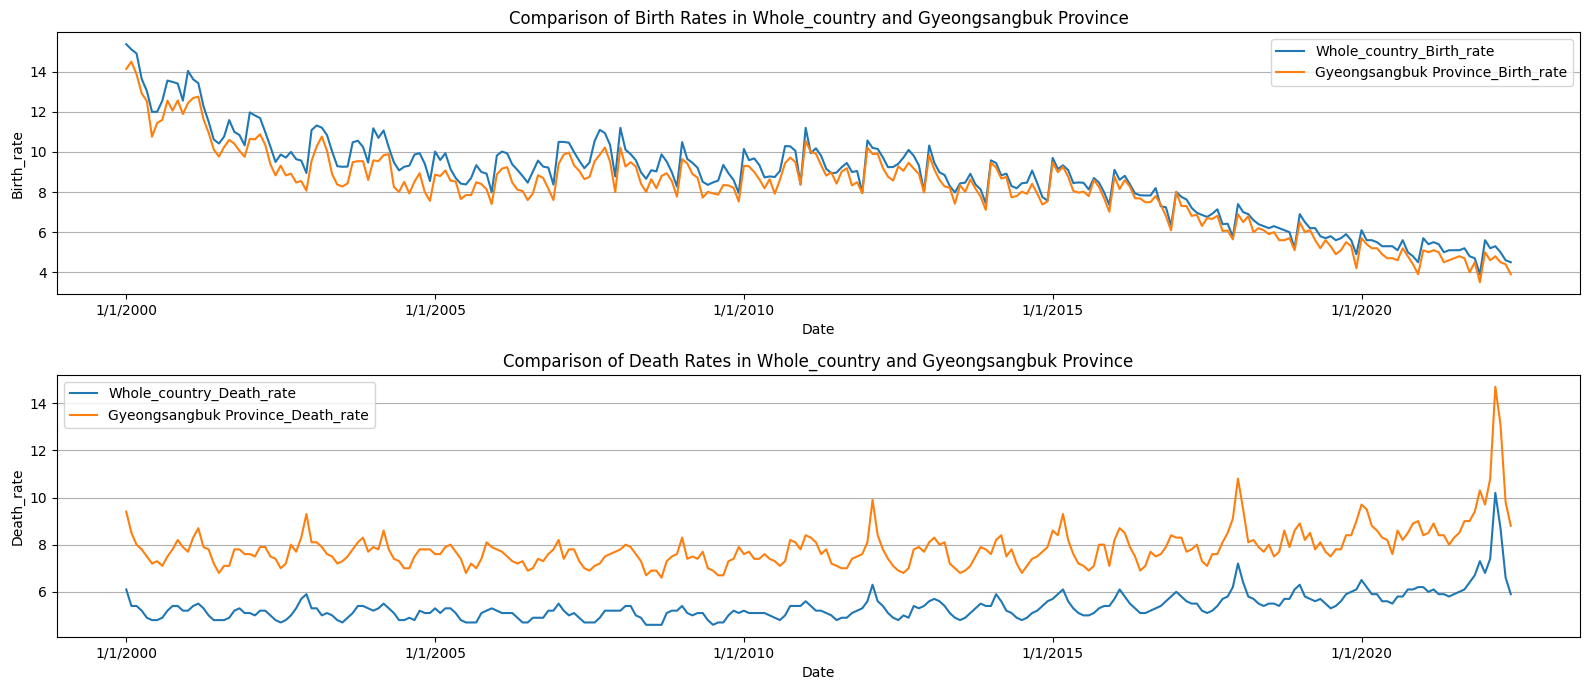

In [18]:
plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=Whole_country, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=data[data.Region == 'Gyeongsangbuk-do'], x='Date', y='Birth_rate' ,label='Gyeongsangbuk Province_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Gyeongsangbuk Province')
plt.ylabel('Birth_rate')

plt.subplot(2, 1, 2)

sns.lineplot(data=Whole_country, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=data[data.Region == 'Gyeongsangbuk-do'], x='Date', y='Death_rate', label='Gyeongsangbuk Province_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Gyeongsangbuk Province')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Comparison Whole Country and Gyeongsangnam-do

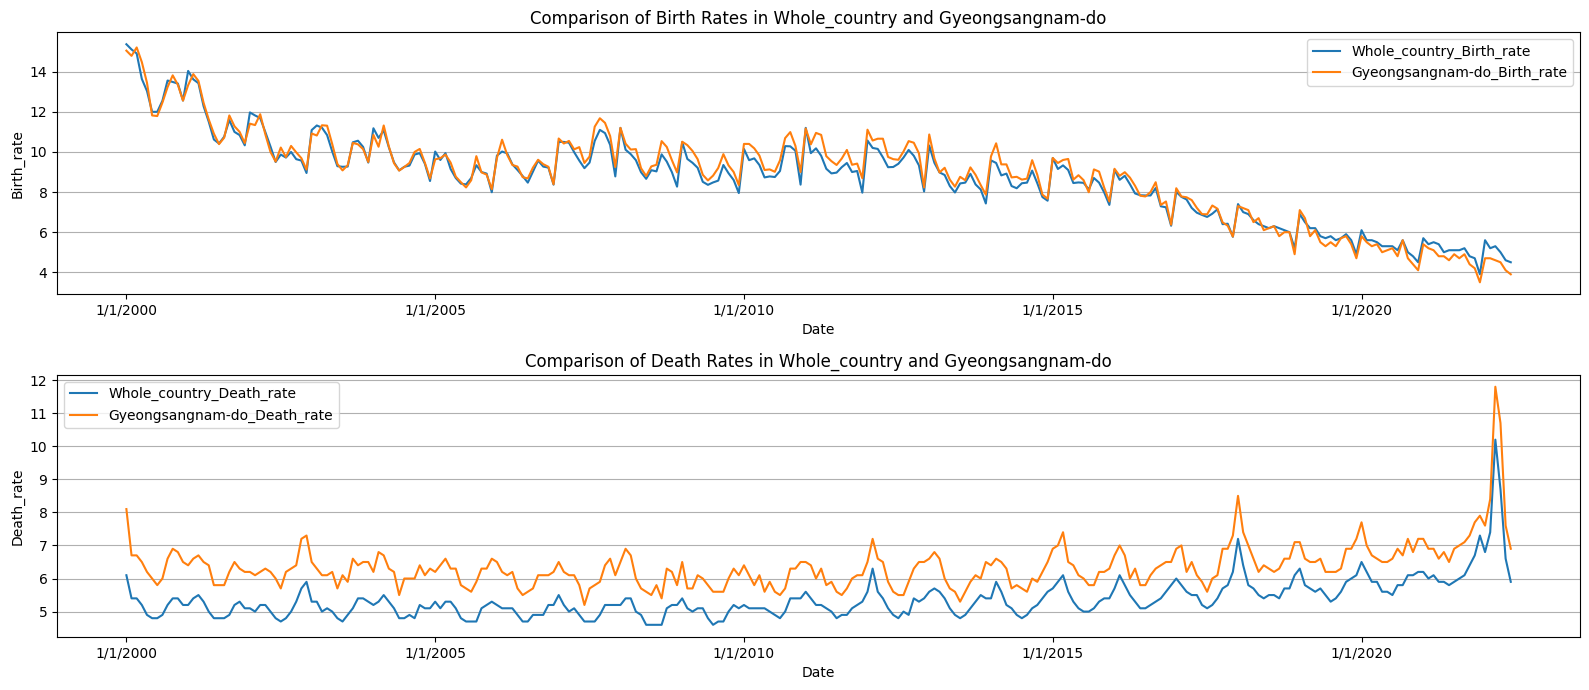

In [19]:
plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=Whole_country, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=data[data.Region == 'Gyeongsangnam-do'], x='Date', y='Birth_rate' ,label='Gyeongsangnam-do_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Gyeongsangnam-do')
plt.ylabel('Birth_rate')

plt.subplot(2, 1, 2)

sns.lineplot(data=Whole_country, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=data[data.Region == 'Gyeongsangnam-do'], x='Date', y='Death_rate', label='Gyeongsangnam-do_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Gyeongsangnam-do')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Comparison Whole Country and Jeollabuk Province

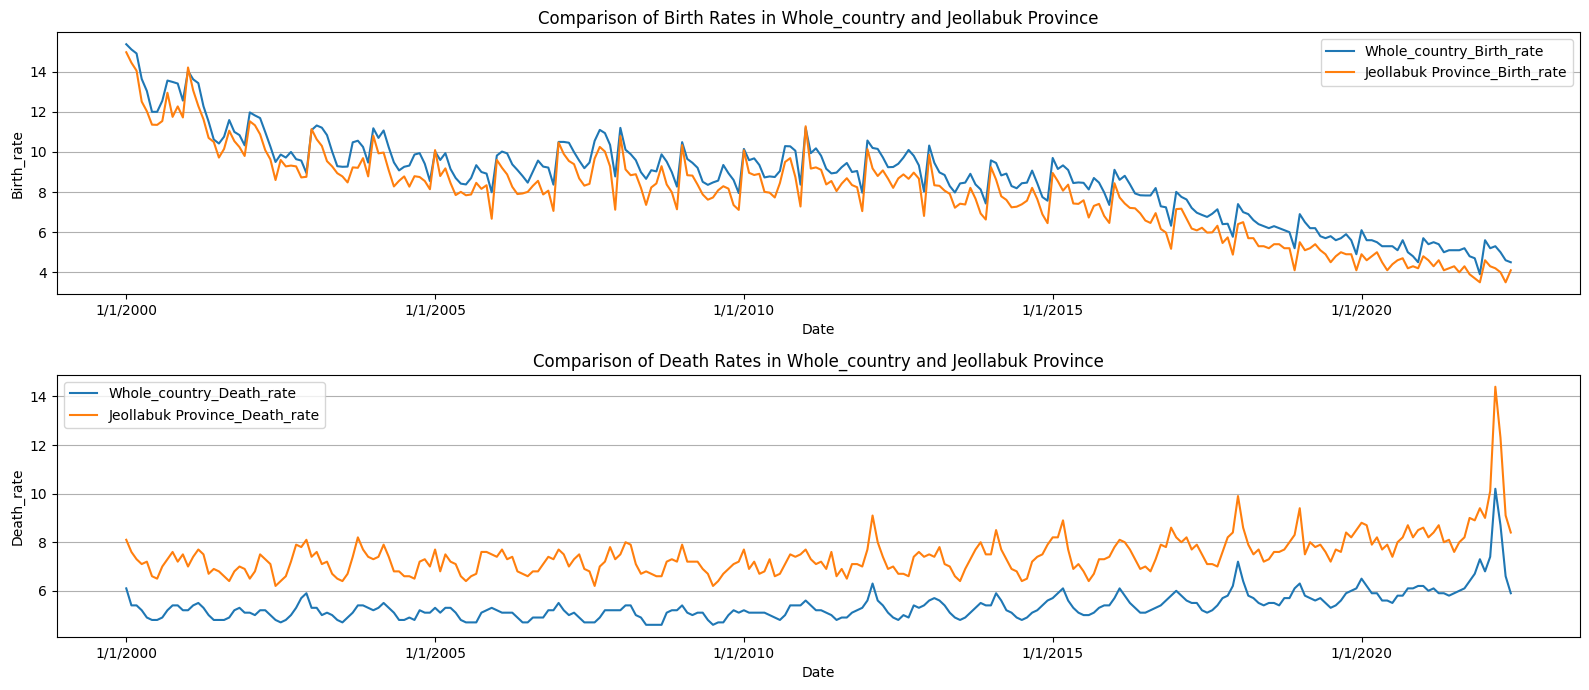

In [20]:
plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=Whole_country, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=data[data.Region == 'Jeollabuk-do'], x='Date', y='Birth_rate' ,label='Jeollabuk Province_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Jeollabuk Province')
plt.ylabel('Birth_rate')

plt.subplot(2, 1, 2)

sns.lineplot(data=Whole_country, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=data[data.Region == 'Jeollabuk-do'], x='Date', y='Death_rate', label='Jeollabuk Province_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Jeollabuk Province')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Comparison Whole Country and Jeollanam Province

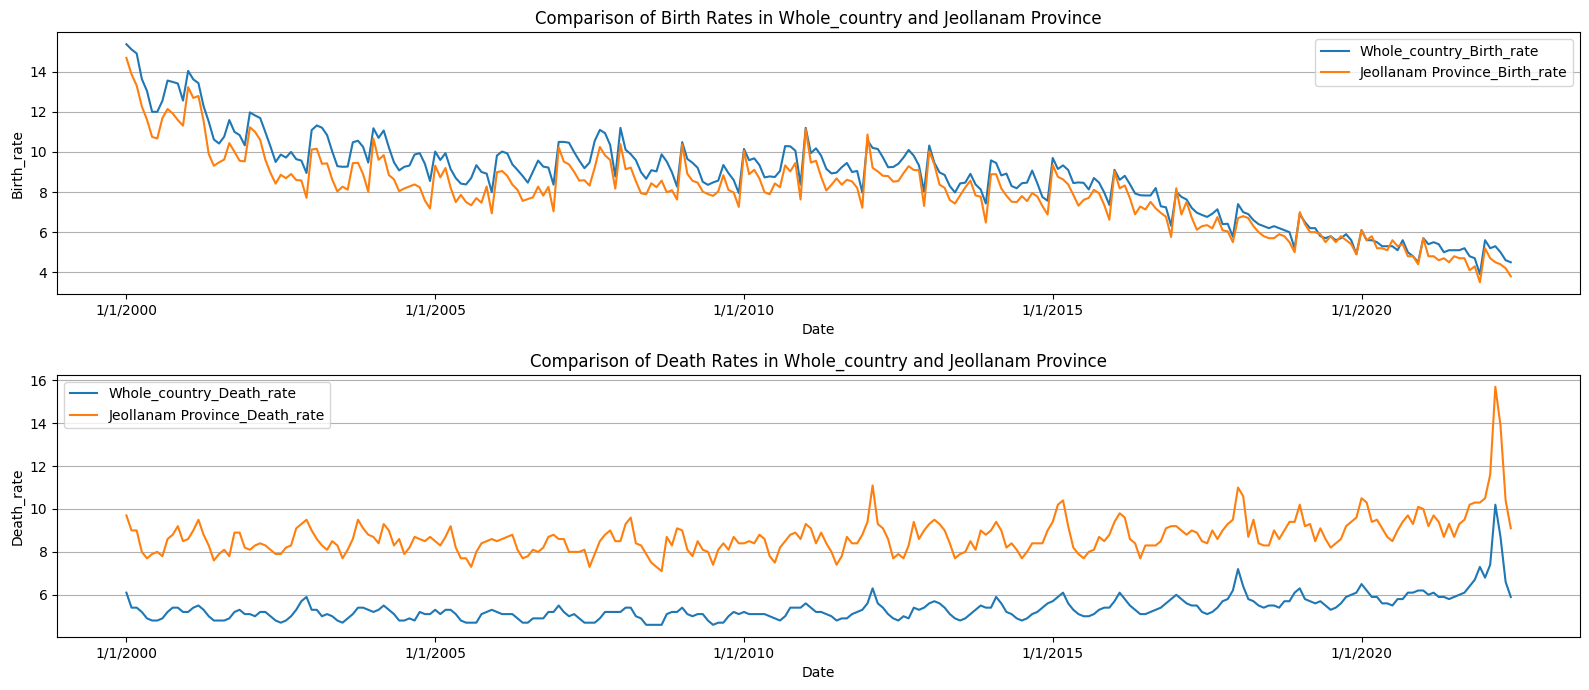

In [21]:
plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=Whole_country, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=data[data.Region == 'Jeollanam-do'], x='Date', y='Birth_rate' ,label='Jeollanam Province_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Jeollanam Province')
plt.ylabel('Birth_rate')

plt.subplot(2, 1, 2)

sns.lineplot(data=Whole_country, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=data[data.Region == 'Jeollanam-do'], x='Date', y='Death_rate', label='Jeollanam Province_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Jeollanam Province')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Comparison Whole Country and Ulsan

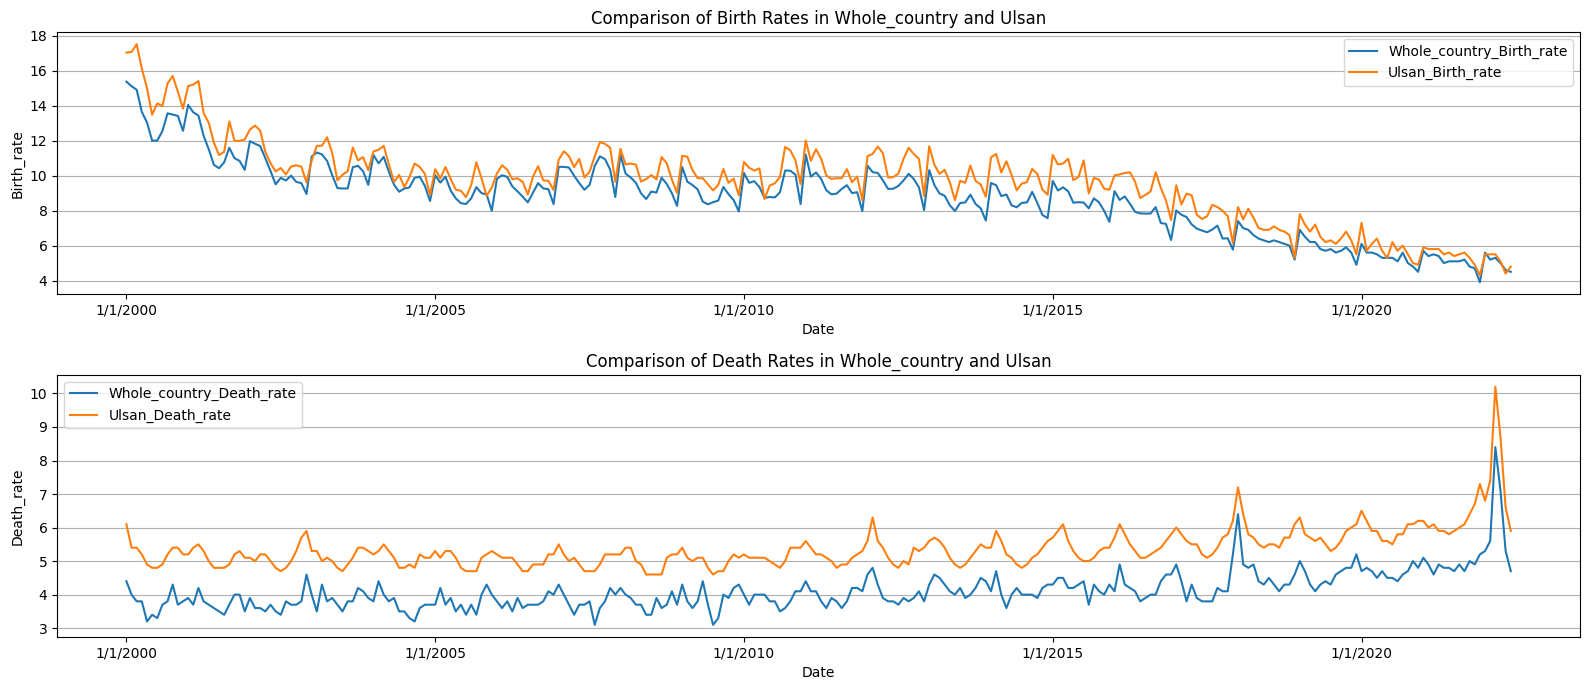

In [22]:
plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=Whole_country, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=data[data.Region == 'Ulsan'], x='Date', y='Birth_rate' ,label='Ulsan_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Ulsan')
plt.ylabel('Birth_rate')

plt.subplot(2, 1, 2)

sns.lineplot(data=data[data.Region == 'Ulsan'], x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=Whole_country, x='Date', y='Death_rate', label='Ulsan_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Ulsan')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Comparison Whole Country and Sejong

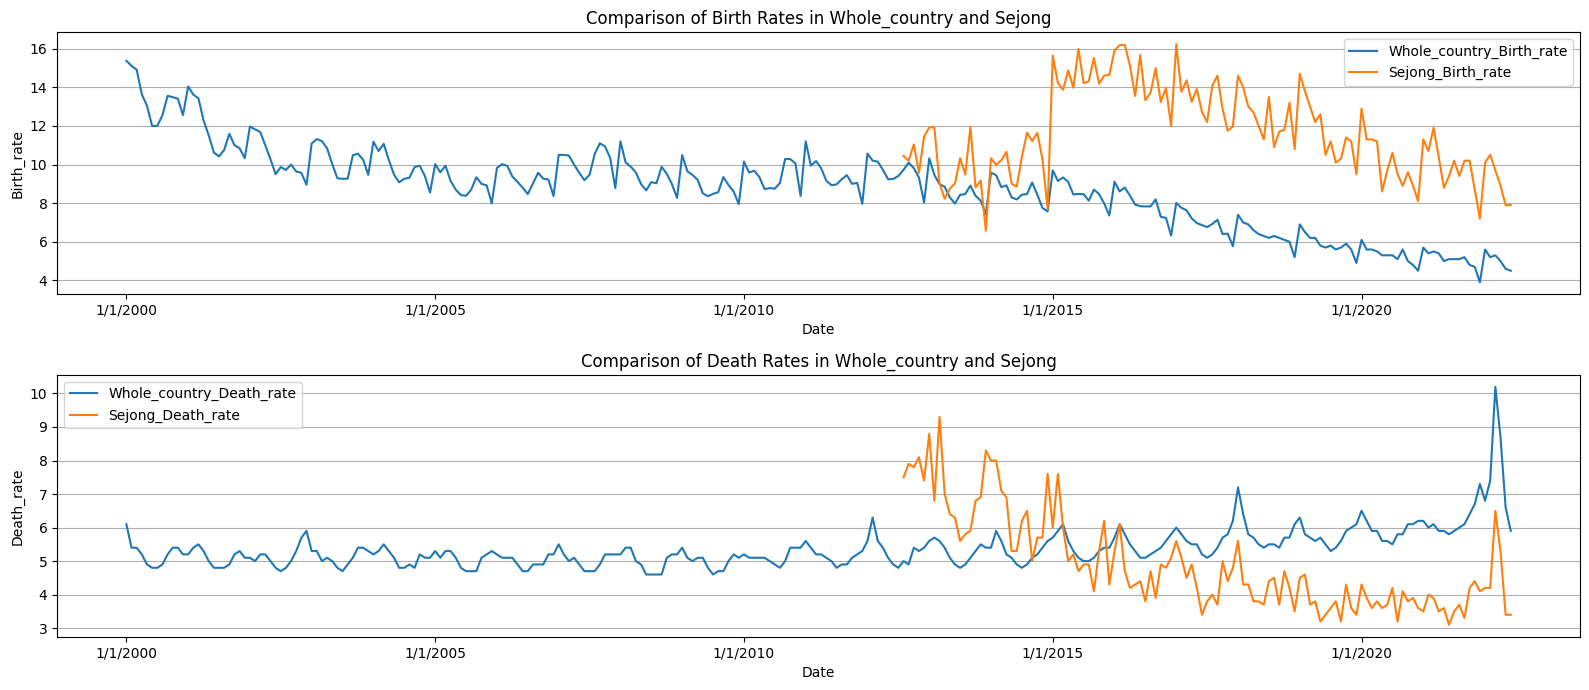

In [23]:
plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=Whole_country, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=data[data.Region == 'Sejong'], x='Date', y='Birth_rate' ,label='Sejong_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Sejong')
plt.ylabel('Birth_rate')

plt.subplot(2, 1, 2)

sns.lineplot(data=Whole_country, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=data[data.Region == 'Sejong'], x='Date', y='Death_rate', label='Sejong_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Sejong')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Comparison Whole Country and Daegu

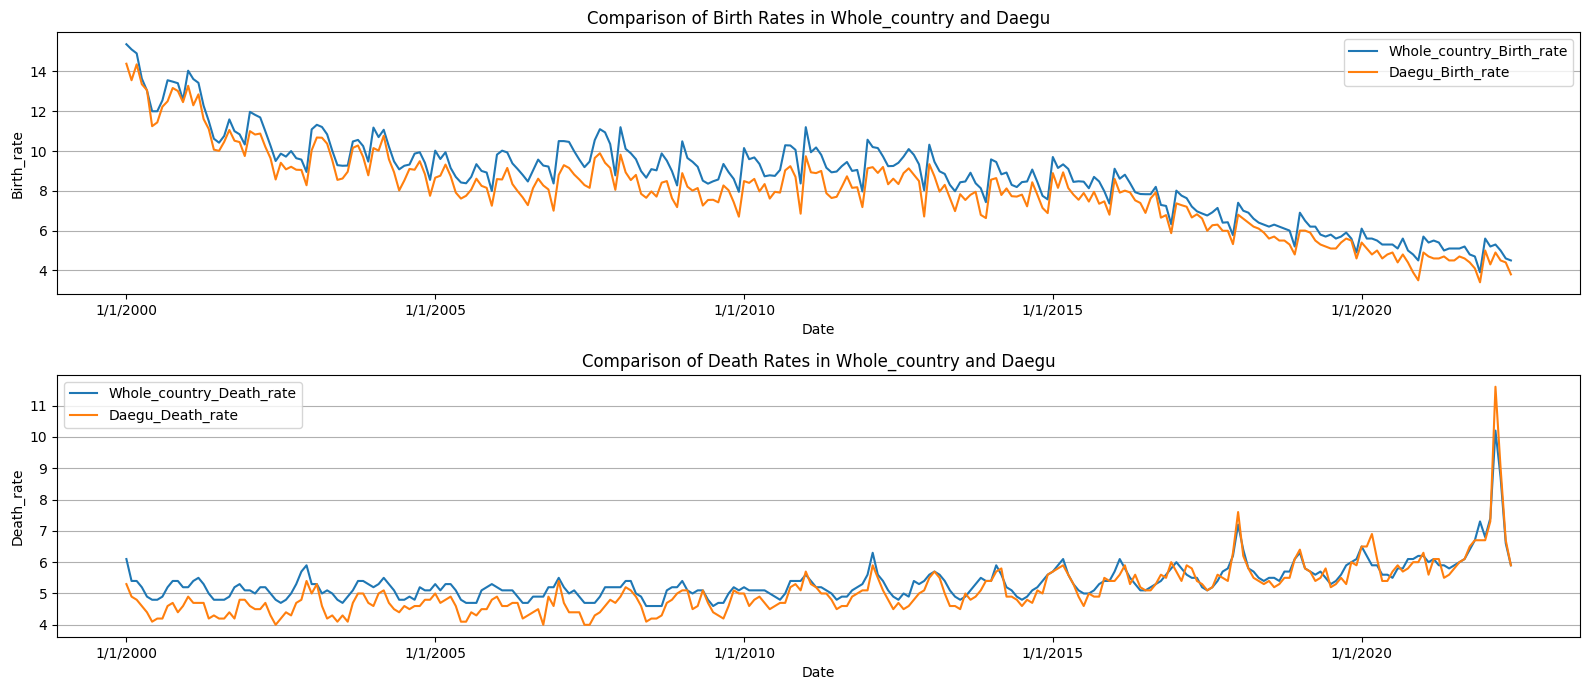

In [24]:
plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=Whole_country, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=data[data.Region == 'Daegu'], x='Date', y='Birth_rate' ,label='Daegu_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Daegu')
plt.ylabel('Birth_rate')

plt.subplot(2, 1, 2)

sns.lineplot(data=Whole_country, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=data[data.Region == 'Daegu'], x='Date', y='Death_rate', label='Daegu_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Daegu')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Comparison Whole Country and Daejeon

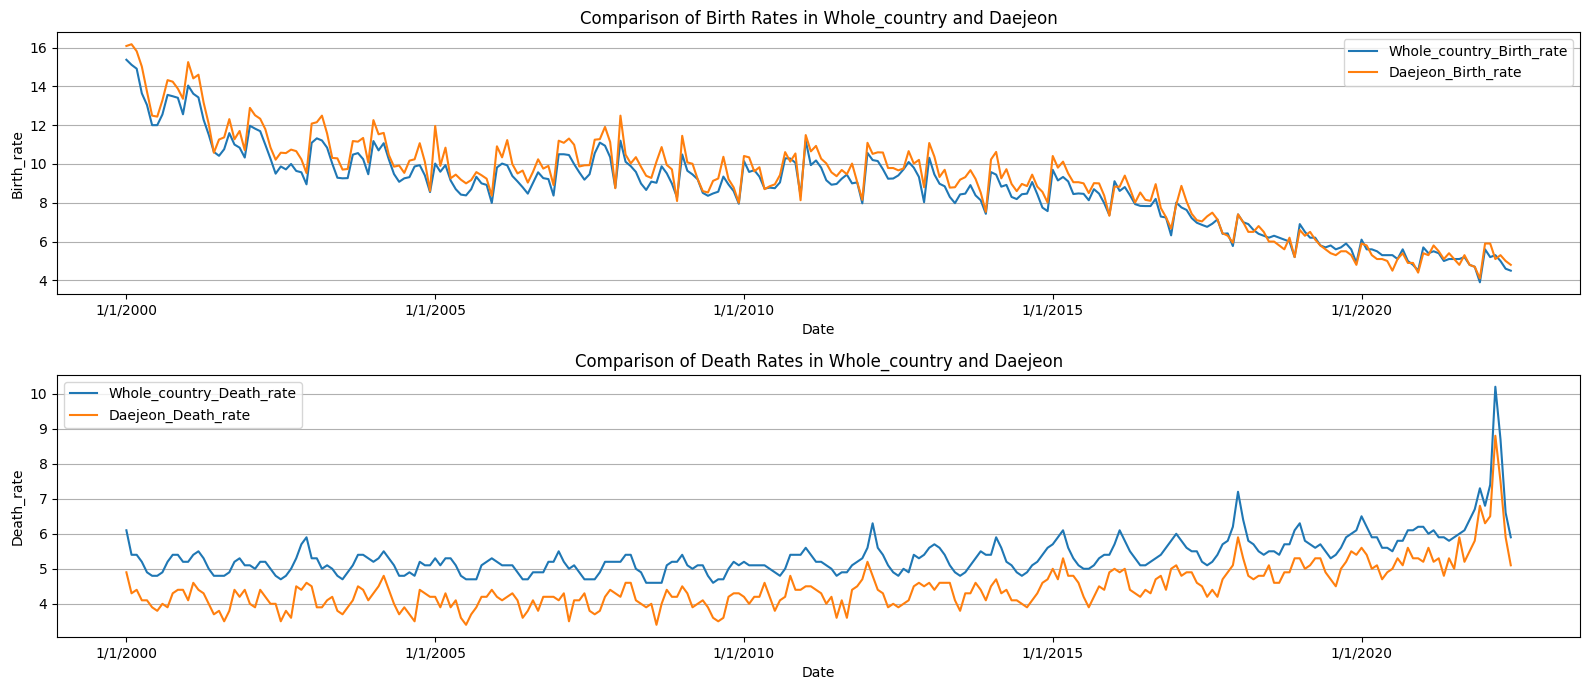

In [25]:
plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=Whole_country, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=data[data.Region == 'Daejeon'], x='Date', y='Birth_rate' ,label='Daejeon_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Daejeon')
plt.ylabel('Birth_rate')

plt.subplot(2, 1, 2)

sns.lineplot(data=Whole_country, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=data[data.Region == 'Daejeon'], x='Date', y='Death_rate', label='Daejeon_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Daejeon')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Comparison Whole Country and Gangwon Province

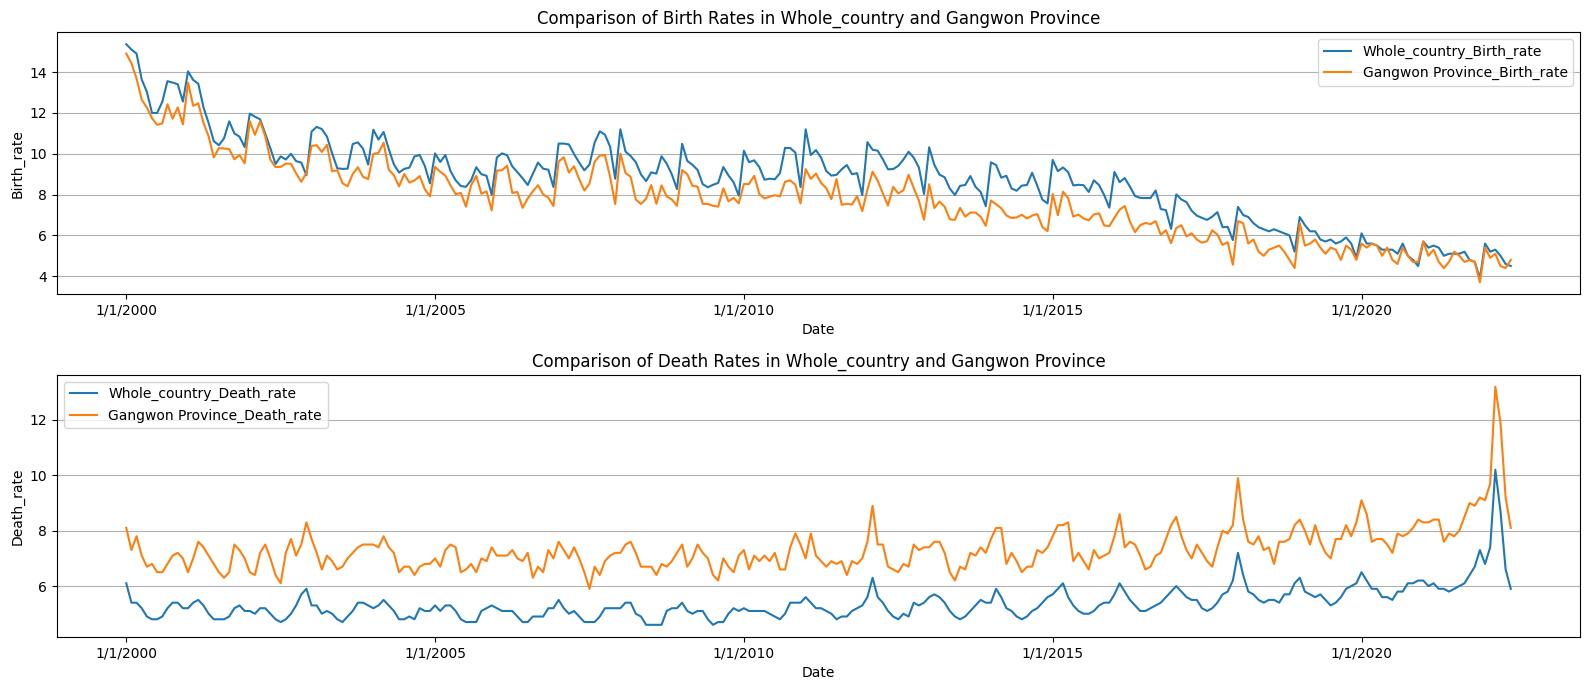

In [26]:
plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=Whole_country, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=data[data.Region == 'Gangwon-do'], x='Date', y='Birth_rate' ,label='Gangwon Province_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Gangwon Province')
plt.ylabel('Birth_rate')

plt.subplot(2, 1, 2)

sns.lineplot(data=Whole_country, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=data[data.Region == 'Gangwon-do'], x='Date', y='Death_rate', label='Gangwon Province_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Gangwon Province')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Comparison Whole Country and Gwangju

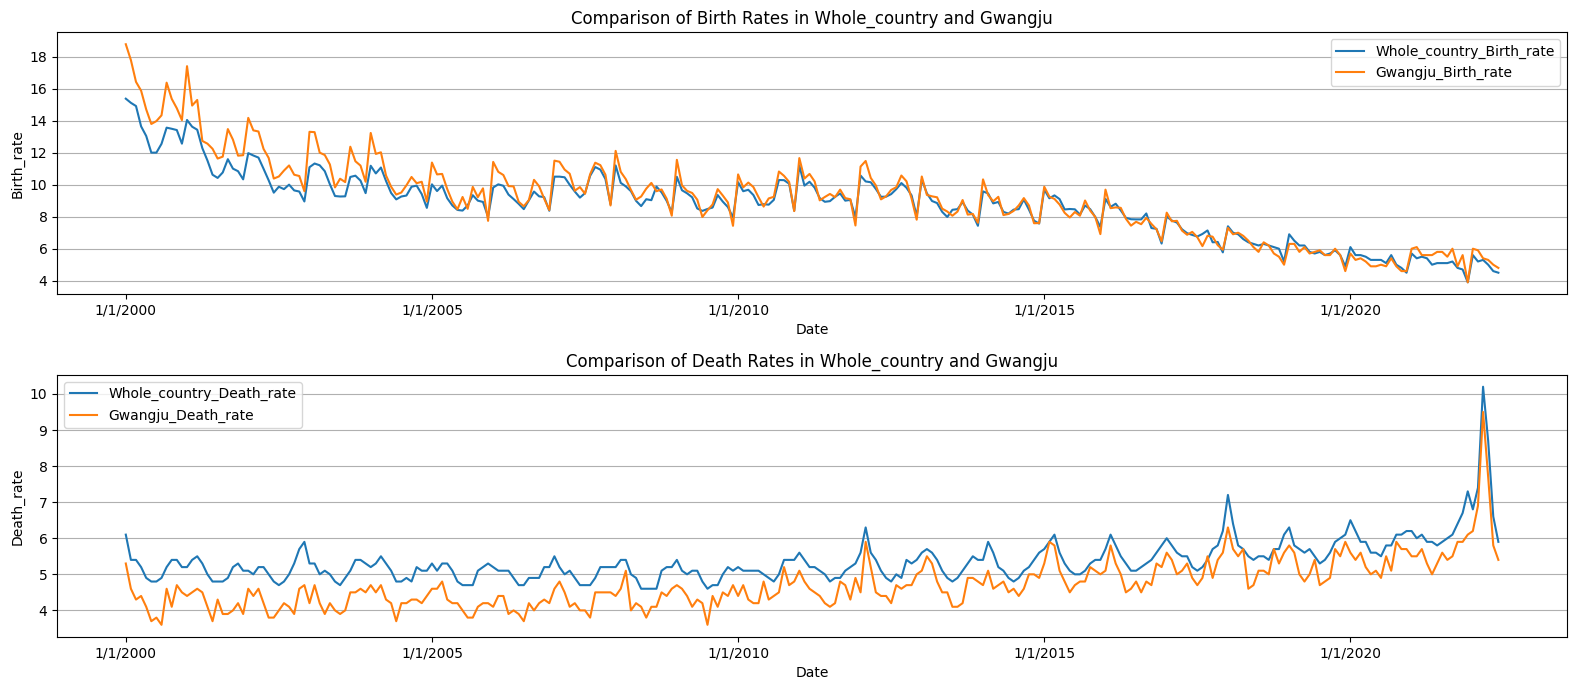

In [27]:
plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=Whole_country, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=data[data.Region == 'Gwangju'], x='Date', y='Birth_rate' ,label='Gwangju_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Gwangju')
plt.ylabel('Birth_rate')

plt.subplot(2, 1, 2)

sns.lineplot(data=Whole_country, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=data[data.Region == 'Gwangju'], x='Date', y='Death_rate', label='Gwangju_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Gwangju')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()